# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

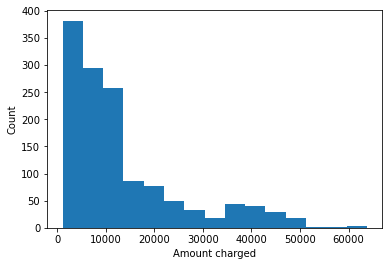

In [7]:
# Create histogram plot of charges in medical df
charges = medical['charges']
histo_charges = plt.hist(charges, bins = 15)
_ = plt.xlabel('Amount charged')
_ = plt.ylabel('Count')
plt.show()

In [8]:
# Calculate mean and sample std of charges
charges_mean = np.mean(charges)
charges_std = np.std(charges, ddof = 1)

print('The mean of the charges is:', charges_mean)
print('The std of the charges is:', charges_std)

The mean of the charges is: 13270.422265141257
The std of the charges is: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We can apply the Central Limit Theorem as we did in Part A of this case study since we have such large sample size (thus assume sample distribution of the mean takes a normal distribution).  We can then take the mean of the sample as an estimate for the mean of the population and calculate the std of the mean (standard deviation of the sampling distribution of the mean) and then the z values and find how likely the mean would be actually below 12000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  Since we want to know if the actual mean charge has fallen below 12,000, we only actually care about one side of the mean (the lower side) and not both sides.  Below we calculate the std of the mean as 331.06 and can immediately see that the administrator shouldn't be concerned that the mean is actually below 12,000 for the population of charges at the hospital since that would be almost 4 std deviations from the estimate of the mean from our large sample (13,270.42).  We calculate the 95% confidence intervals for the mean below and can clearly see that 12000 is far outside this interval.  We can safely reject the null hypothesis that the average charge is below 12000 as the p-value is very small.

In [19]:
# Take mean of our sample as estimate of pop mean (CLT)
pop_mean_est = charges_mean

# Calculate std of this mean using formula from part A
std_mean = charges_std/np.sqrt(1338)

print(std_mean)

331.06745431568226


In [20]:
# Get relevant z-value for 95% Confidence Interval (we know its z=1.96 from part A)
z_val = 1.96
# Calculate Margin of Error of mean
mean_MoE = z_val*std_mean

In [21]:
# Calculate 95% Confidence Interval of the mean
mean_conf_int = (pop_mean_est - mean_MoE, pop_mean_est + mean_MoE)

print('The 95% Confidence Interval of the mean of the charges is:', mean_conf_int)

The 95% Confidence Interval of the mean of the charges is: (12621.53005468252, 13919.314475599993)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with ins and people without ins are charged the same.  The alternative hypothesis is that they are charged a significantly different amount.  We assume that the variances of the two groups are approximately equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
with_ins = medical[medical['insuranceclaim'] == 1].reset_index(drop = True)
without_ins = medical[medical['insuranceclaim'] == 0].reset_index(drop = True)
print(with_ins.shape)
print(without_ins.shape)

(783, 8)
(555, 8)


In [16]:
def calc_pooled_std(n1, std1, n2, std2):
    # Function to calculate pooled std of two groups
    x = (n1 - 1)*std1**2
    y = (n2 - 1)*std2**2
    z = n1 + n2 - 2
    
    return np.sqrt((x + y)/z)

def calc_t_statistic(mean1, mean2, n1, n2, pool_std):
    # Function to calculate t-statistic
    a = mean1 - mean2
    b = (1/n1) + (1/n2)
    
    return a/(pool_std*np.sqrt(b))

In [14]:
# Get just the charges
with_ins_charges = with_ins['charges']
without_ins_charges = without_ins['charges']

# Calculate means 
with_ins_mean = np.mean(with_ins_charges)
without_ins_mean = np.mean(without_ins_charges)

# Calculate sample std
with_ins_std = np.std(with_ins_charges, ddof = 1)
without_ins_std = np.std(without_ins_charges, ddof = 1)

# Get size of each sample
count_with = len(with_ins_charges)
count_without = len(without_ins_charges)


In [17]:
std_p = calc_pooled_std(count_with, with_ins_std, count_without, without_ins_std)

t_stat = calc_t_statistic(with_ins_mean, without_ins_mean, count_with, count_without, std_p)
print('The manually calculated t-test statistic value is:', t_stat)

The manually calculated t-test statistic value is: 11.89329903087671


In [22]:
from scipy.stats import ttest_ind
t_stat_auto, p_val_auto = ttest_ind(with_ins_charges, without_ins_charges)
print('The scipy calculated values of the t-statistic and the p-value are respectively:', t_stat_auto, p_val_auto)

The scipy calculated values of the t-statistic and the p-value are respectively: 11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test